In [1]:
library(DESeq2)
library(EnhancedVolcano)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [2]:
general_celltype_gene_exp <- read.csv("pseudobulk_LC1_v_LC2_across_studies_count.csv",row.names=1)

metadata <- read.csv("pseudobulk_LC1_v_LC2_across_studies_meta.csv", row.names=1)

general_celltype_gene_exp <- na.omit(general_celltype_gene_exp)
general_celltype_gene_exp <- t(general_celltype_gene_exp)

general_celltype_gene_exp <- general_celltype_gene_exp[,rownames(metadata)]

# remove small samples
general_celltype_gene_exp <- general_celltype_gene_exp[,rownames(metadata)]
general_celltype_gene_exp <- general_celltype_gene_exp[,metadata$Cell_Number > 10]
metadata = metadata[colnames(general_celltype_gene_exp),]


In [9]:
metadata

,General_Celltype,biosample_id,donor_id,time_post_partum_days,time_post_partum_weeks,milk_stage,infant_sick_YN,Age,Study,Donor,⋯,total_counts,total_counts_mt,pct_counts_mt,Twigger.Labels,Nyquist.Labels,Nyquist.Epithelial.Cell.Subclusters,leiden,clusters,Sample,Cell_Number
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
LC1_SIGAF4,nan,nan,SIGAF4,NaN,NaN,nan,nan,NaN,Twigger2022,SIGAF4,⋯,NaN,NaN,NaN,Luminal_HMC1,nan,nan,4,LC1,SIGAF4,1015
LC1_LMC1,nan,nan,LMC1,NaN,NaN,nan,nan,NaN,Twigger2022,LMC1,⋯,NaN,NaN,NaN,Luminal_HMC1,nan,nan,5,LC1,LMC1,5761
LC2_LMC3,nan,nan,LMC3,NaN,NaN,nan,nan,NaN,Twigger2022,LMC3,⋯,NaN,NaN,NaN,Luminal_HMC2,nan,nan,2,LC2,LMC3,5360
LC1_SIGAD4,nan,nan,SIGAD4,NaN,NaN,nan,nan,NaN,Twigger2022,SIGAD4,⋯,NaN,NaN,NaN,Luminal_HMC1,nan,nan,4,LC1,SIGAD4,4442
LC2_BM05_26wk_r1,LC2,BM05_26wk_r1,nan,NaN,NaN,nan,nan,NaN,Nyquist2022,nan,⋯,NaN,NaN,NaN,nan,LC2,KRT high lactocytes 2,2,LC2,BM05_26wk_r1,692
LC2_SIGAG4,nan,nan,SIGAG4,NaN,NaN,nan,nan,NaN,Twigger2022,SIGAG4,⋯,NaN,NaN,NaN,Luminal_HMC2,nan,nan,3,LC2,SIGAG4,3942
LC2_LMC1,nan,nan,LMC1,NaN,NaN,nan,nan,NaN,Twigger2022,LMC1,⋯,NaN,NaN,NaN,Luminal_HMC2,nan,nan,0,LC2,LMC1,7020
LC2_BM03_10dpp_r2,LC2,BM03_10dpp_r2,BM03,10,1.43,transitional,no,31,Nyquist2022,nan,⋯,NaN,NaN,NaN,nan,LC2,Secretory Lactocytes,1,LC2,BM03_10dpp_r2,657
LC1_BM05_26wk_r1,LC1,BM05_26wk_r1,nan,NaN,NaN,nan,nan,NaN,Nyquist2022,nan,⋯,NaN,NaN,NaN,nan,LC1,LC1,5,LC1,BM05_26wk_r1,158


In [5]:
cepi <- general_celltype_gene_exp[,metadata$clusters %in% c("LC1","LC2")]
    
    cepi <- na.omit(cepi)


    # remove very late samples and low cell number samples
    cepi_meta = metadata[colnames(cepi),]
dds_hmo <- DESeqDataSetFromMatrix(countData= cepi, colData = cepi_meta, 
                                     design = ~ 1 +  Study+clusters)
dds_lrt_hmo <- DESeq(dds_hmo,test="LRT",reduced=~1+Study)
    res<-results(dds_lrt_hmo)
    #write.csv(res,paste("/Users/snyquist/Dropbox (Gladstone)/BM_Integration/HMO_longitudinal/DESeq_HMO/DE_ug_ml/",c,"_",hmo,"_DE.csv",sep=""))
    
    print(subset(res, padj<0.05))
  

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

log2 fold change (MLE): clusters LC2 vs LC1 
LRT p-value: '~ 1 + Study + clusters' vs '~ 1 + Study' 
DataFrame with 14025 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
A1BG           5.07403      -1.728896  0.435634   9.03310 2.65134e-03
A1BG.AS1       2.76267      -0.704148  0.218095   8.87843 2.88560e-03
A1CF           0.63093      -2.226788  0.985241   5.29142 2.14308e-02
A2M            6.95834      -2.168880  0.372067  27.53520 1.54261e-07
A2ML1          1.56594      -3.722688  0.480392  53.49695 2.58994e-13
...                ...            ...       ...       ...         ...
ZYX          70.746706      -1.072181 0.1226100  74.39713 6.38819e-18
ZZZ3         56.781105      -0.421327 0.0932048  21.06765 4.43350e-06
hsa.mir.1199  8.502252      -1.087063 0.1501686  55.16920 1.10588e-13
hsa.mir.125a  0.659211      -2.706077 1.1744399   5.96264 1.46121e-02
hsa.mir.6080  3.499

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


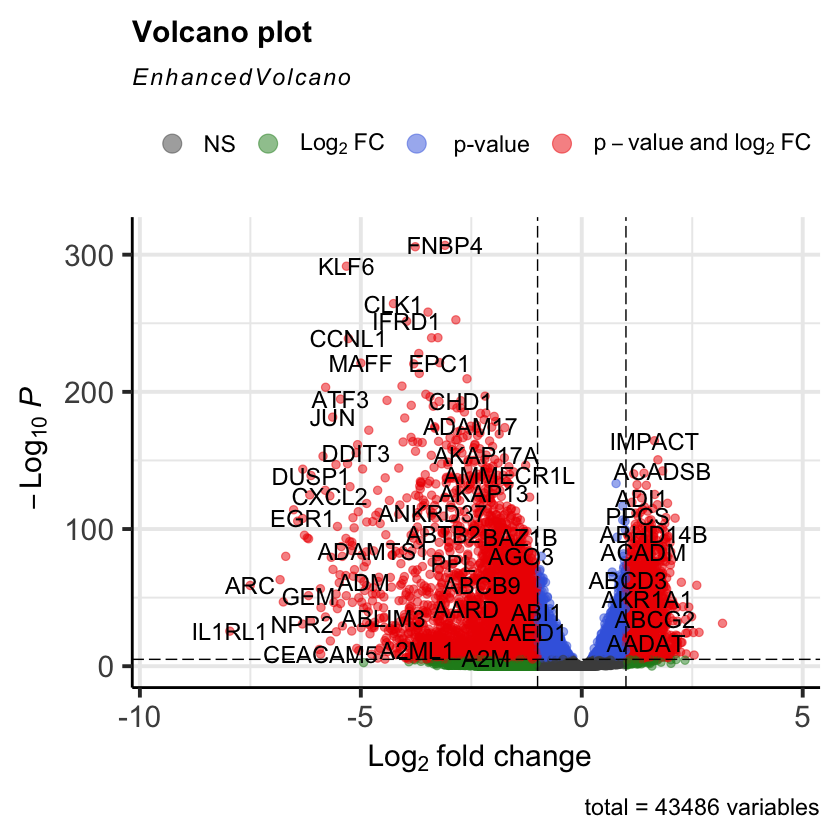

In [13]:
print(subset(res, padj<0.05))

log2 fold change (MLE): clusters LC2 vs LC1 
LRT p-value: '~ 1 + Study + clusters' vs '~ 1 + Study' 
DataFrame with 14025 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
A1BG           5.07403      -1.728896  0.435634   9.03310 2.65134e-03
A1BG.AS1       2.76267      -0.704148  0.218095   8.87843 2.88560e-03
A1CF           0.63093      -2.226788  0.985241   5.29142 2.14308e-02
A2M            6.95834      -2.168880  0.372067  27.53520 1.54261e-07
A2ML1          1.56594      -3.722688  0.480392  53.49695 2.58994e-13
...                ...            ...       ...       ...         ...
ZYX          70.746706      -1.072181 0.1226100  74.39713 6.38819e-18
ZZZ3         56.781105      -0.421327 0.0932048  21.06765 4.43350e-06
hsa.mir.1199  8.502252      -1.087063 0.1501686  55.16920 1.10588e-13
hsa.mir.125a  0.659211      -2.706077 1.1744399   5.96264 1.46121e-02
hsa.mir.6080  3.499

In [14]:
write.csv(res,paste("/Users/snyquist/Dropbox (Gladstone)/BM_Integration/HMO_longitudinal/DESeq_HMO/LC1_LC2_cross_study_DE.csv",sep=""))


ERROR: Error in parse(text = x, srcfile = src): <text>:1:8: unexpected '['
1: Futs = [
           ^


In [7]:
cepi <- general_celltype_gene_exp[,metadata$clusters %in% c("LC1","LC2")]
    
    cepi <- na.omit(cepi)


    # remove very late samples and low cell number samples
    cepi_meta = metadata[colnames(cepi),]
dds_hmo <- DESeqDataSetFromMatrix(countData= cepi, colData = cepi_meta, 
                                     design = ~ Study+clusters)
dds_lrt_hmo <- DESeq(dds_hmo,test="Wald")#,reduced=~Study)
    res_2<-results(dds_lrt_hmo)
    #write.csv(res,paste("/Users/snyquist/Dropbox (Gladstone)/BM_Integration/HMO_longitudinal/DESeq_HMO/DE_ug_ml/",c,"_",hmo,"_DE.csv",sep=""))
    
   # print(subset(res, padj<0.05))
  

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is reco

In [23]:
print(subset(res_2, padj<0.05))

log2 fold change (MLE): clusters LC2 vs LC1 
Wald test p-value: clusters LC2 vs LC1 
DataFrame with 16395 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat      pvalue
             <numeric>      <numeric> <numeric> <numeric>   <numeric>
A1BG          5.074027      -1.728896  0.435634  -3.96869 7.22698e-05
A1BG.AS1      2.762673      -0.704148  0.218095  -3.22862 1.24388e-03
A1CF          0.630930      -2.226788  0.985241  -2.26014 2.38123e-02
A2M           6.958336      -2.168880  0.372067  -5.82927 5.56714e-09
A2M.AS1       0.944602      -0.842769  0.300654  -2.80312 5.06103e-03
...                ...            ...       ...       ...         ...
ZYX          70.746706      -1.072181 0.1226100  -8.74464 2.23718e-18
ZZZ3         56.781105      -0.421327 0.0932048  -4.52044 6.17100e-06
hsa.mir.1199  8.502252      -1.087063 0.1501686  -7.23895 4.52186e-13
hsa.mir.125a  0.659211      -2.706077 1.1744399  -2.30414 2.12146e-02
hsa.mir.6080  3.499887      -3.7002

In [22]:
write.csv(res_2,paste("/Users/snyquist/Dropbox (Gladstone)/BM_Integration/HMO_longitudinal/DESeq_HMO/LC1_LC2_cross_study_DE_wald.csv",sep=""))


In [19]:
pdf(width = 7, height = 10,file="/Users/snyquist/Dropbox (Gladstone)/BM_Integration/HMO_longitudinal/scRNA_HMO_HM/Figure_components/Figure1/FigS1C_LC1_LC2_volcano.pdf")

EnhancedVolcano(res_2,
    lab = rownames(res_2),
    x = 'log2FoldChange',
    y = 'padj', selectLab =c('ST6GALNAC4', 'B4GALT1', 'B3GALT5', 'B4GALT7', 'B3GAT3', 'ST6GAL1',
       'B3GNT9', 'B4GALT2', 'B4GALT3', 'ST6GALNAC2','B3GALT4', 'GCNT1', 'FUT2', 'B4GALT4', 'GCNT2', 'B3GALNT2', 'B3GNT7',
       'B3GNT3', 'ST3GAL1', 'B4GALT5', 'FUT11', 'FUT3', 'B3GNT2', 'B3GNT5'),drawConnectors = TRUE,
    widthConnectors = 1.0,
    colConnectors = 'black',
               max.overlaps=30)

dev.off()

Warning message:
“One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value...”


pdf 
  2

In [15]:
?pdf


In [2]:
BiocManager::install('EnhancedVolcano')

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Installing package(s) 'EnhancedVolcano'




The downloaded binary packages are in
	/var/folders/2w/wzpnv4x92_lbnlcccg_sb4t40000gq/T//RtmpYXYXDI/downloaded_packages


Old packages: 'askpass', 'bdsmatrix', 'BH', 'BiocManager', 'bit', 'blob',
  'boot', 'brew', 'brio', 'broom', 'bslib', 'cachem', 'Cairo', 'callr',
  'circlize', 'class', 'classInt', 'cli', 'clue', 'cluster', 'coda',
  'codetools', 'colorspace', 'commonmark', 'cowplot', 'cpp11', 'credentials',
  'crosstalk', 'curl', 'data.table', 'DBI', 'dbplyr', 'deldir', 'desc',
  'digest', 'downlit', 'dplyr', 'dqrng', 'DT', 'e1071', 'evaluate', 'expm',
  'fansi', 'fastICA', 'filelock', 'fitdistrplus', 'FNN', 'fontawesome',
  'foreign', 'formatR', 'fs', 'future', 'future.apply', 'gert', 'ggbeeswarm',
  'ggforce', 'ggfun', 'ggnetwork', 'ggplot2', 'ggraph', 'ggrastr', 'ggrepel',
  'ggridges', 'ggsci', 'gh', 'globals', 'glue', 'gplots', 'graphlayouts',
  'gtable', 'gtools', 'hdf5r', 'highr', 'hms', 'htmltools', 'htmlwidgets',
  'httpuv', 'httr', 'igraph', 'interp', 'IRkernel', 'isoband', 'jsonlite',
  'KernSmooth', 'knitr', 'labeling', 'later', 'lattice', 'leiden',
  'leidenbase', 'lifecycle', 'listenv', 